In [2]:
# This is scoring.py on github, but is masked by a folder of the same name...
import sys
sys.path.append('/Users/simon/git/nplinker/prototype/')
# import scoring_functions
%reload_ext autoreload
%autoreload 2

In [3]:
path = "/Users/simon/nplinker_datasets/carnegie_nomibig_27112019/"

In [4]:
import csv
import numpy
import os

In [5]:
spectra_file = "/Users/simon/nplinker_datasets/carnegie_nomibig_27112019/quantification_table/quantification_table-00000.csv"

In [6]:
ions_membership = {}
with open(spectra_file, 'r') as f:
    r = csv.reader(f)
    header = next(r)
    for l in r:
        spectrum_id = l[0]
        signal = [x.split('.')[0] for x, y in zip(header[:-1], l[:-1]) if float(y) > 0.0 and x.startswith('KRD')]
        ions_membership[spectrum_id] = signal

In [7]:
strains = set()
for s,signal in ions_membership.items():
    if 'KRD_175_ISP3' in signal: # fix for bad-formatting in name
        i = signal.index('KRD_175_ISP3')
        signal[i] = 'KRD175_ISP3'
        ions_membership[s] = signal
    for g in signal:
        gg = g.split('_')[0]
        strains.add(gg)
        if gg == 'KRD':
            print(g)


# make the opposite dictionary, spec items for each strain
strain_dict = {strain: set() for strain in strains}
for spec,signal in ions_membership.items():
    ss = [strain.split('_')[0] for strain in signal]
    for strain in ss:
        strain_dict[strain].add(spec)

media_list = ['ISP2','ISP3','M1','TSB']
media_dict = {m:set() for m in media_list}
for spec,signal in ions_membership.items():
    mm = [strain.split('_')[1].upper() for strain in signal]
    for media in mm:
        media_dict[media].add(spec)


[Text(0,0,'KRD197'),
 Text(0,0,'KRD77'),
 Text(0,0,'KRD209'),
 Text(0,0,'KRD169'),
 Text(0,0,'KRD172'),
 Text(0,0,'KRD184'),
 Text(0,0,'KRD12'),
 Text(0,0,'KRD186'),
 Text(0,0,'KRD171'),
 Text(0,0,'KRD168'),
 Text(0,0,'KRD182'),
 Text(0,0,'KRD96'),
 Text(0,0,'KRD175'),
 Text(0,0,'KRD22'),
 Text(0,0,'KRD128'),
 Text(0,0,'KRD185'),
 Text(0,0,'KRD162'),
 Text(0,0,'KRD174'),
 Text(0,0,'KRD153'),
 Text(0,0,'KRD140'),
 Text(0,0,'KRD26'),
 Text(0,0,'KRD176'),
 Text(0,0,'KRD188'),
 Text(0,0,'KRD70'),
 Text(0,0,'KRD202')]

/Users/simon/.virtualenvs/nplinker-CEvfx91u/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


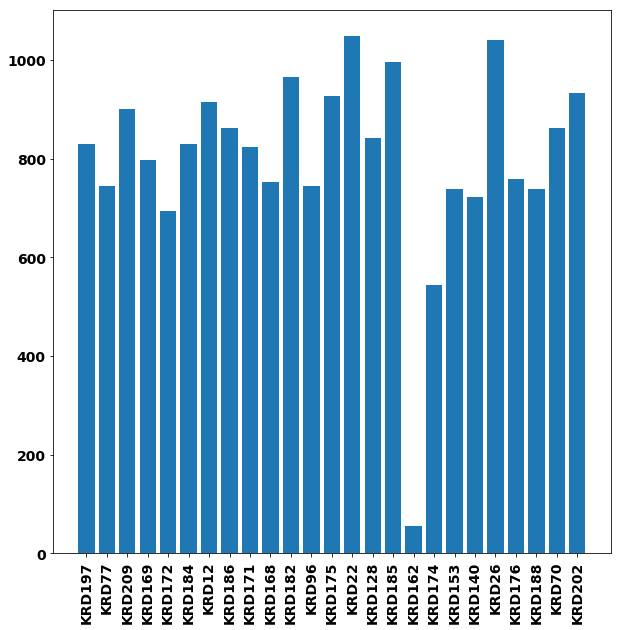

In [8]:
# bat plot of number of spec in each strain
import pylab as plt
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)
plt.figure(figsize=(10,10))
strain_list = list(strains)
counts = [len(strain_dict[strain]) for strain in strain_list]
plt.bar(strain_list,counts)
plt.gca().set_xticklabels(strain_list, rotation = 90)

/Users/simon/.virtualenvs/nplinker-CEvfx91u/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


KRD12
KRD22
KRD26
KRD70
KRD77
KRD96
KRD128
KRD153
KRD140
KRD162
KRD175
KRD197
KRD171
KRD172
KRD174
KRD186
KRD202
KRD169
KRD182
KRD184
KRD185
KRD188
KRD209
KRD176
KRD168
KRD12
KRD22
KRD26
KRD70
KRD77
KRD96
KRD128
KRD153
KRD140
KRD162
KRD175
KRD197
KRD171
KRD172
KRD174
KRD186
KRD202
KRD169
KRD182
KRD184
KRD185
KRD188
KRD209
KRD176
KRD168


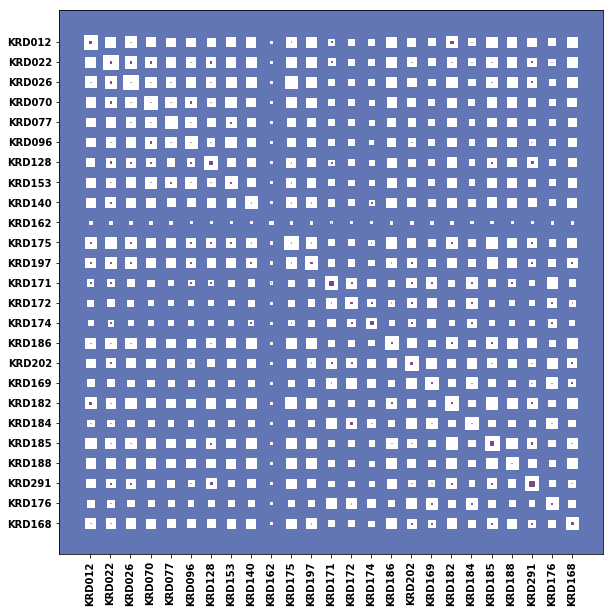

In [16]:
sorted_strain_list = [
	'KRD12',
	'KRD22',
	'KRD26',
	'KRD70',
	'KRD77',
	'KRD96',
	'KRD128',
	'KRD153',
	'KRD140',
	'KRD162',
	'KRD175',
	'KRD197',
	'KRD171',
	'KRD172',
	'KRD174',
	'KRD186',
	'KRD202',
	'KRD169',
	'KRD182',
	'KRD184',
	'KRD185',
	'KRD188',
	'KRD209', # FIXED by SIMON 20/02/2020
	'KRD176',
	'KRD168',	
]

# pairs
import numpy as np
pair_mat = np.zeros((len(strain_list),len(strain_list)))
unique_pair_mat = np.zeros((len(strain_list),len(strain_list)))
for i,s in enumerate(sorted_strain_list):
    for j,t in enumerate(sorted_strain_list):
        inter_s = strain_dict[s].intersection(strain_dict[t])
        pair_mat[i,j] = len(strain_dict[s].intersection(strain_dict[t]))
        for k in sorted_strain_list:
            if k == s or k == t:
                continue
            inter_s = inter_s.difference(strain_dict[k])
        unique_pair_mat[i,j] = len(inter_s)
        
        
        
display_strain_list = []
for s in sorted_strain_list:
    if len(s) < 6:
        # add the zero back in
        s2 = s[:3] + '0' + s[3:]
        display_strain_list.append(s2)
    else:
        display_strain_list.append(s)
        

# HACK - one strain was incorrectly labeled        
pos209 = display_strain_list.index('KRD209')
display_strain_list[pos209] = 'KRD291'

        
plt.figure(figsize=(10,10))
hinton(pair_mat,ax = plt.gca(),background = '#6276B5',add_numbers = False,mat2=unique_pair_mat,mat2_color='#7D458B')
a = plt.xticks(range(len(sorted_strain_list)),sorted_strain_list)
a = plt.yticks(range(len(display_strain_list)),display_strain_list)
plt.gca().set_xticklabels(display_strain_list, rotation = 90)
plt.savefig('hinton_strain_both.png')
write_csv('hinton_strain_total.csv',pair_mat,sorted_strain_list)



# plt.figure(figsize=(10,10))
# hinton(unique_pair_mat,ax = plt.gca(),background = '#A565B2',add_numbers = False)
# a = plt.xticks(range(len(sorted_strain_list)),sorted_strain_list)
# a = plt.yticks(range(len(sorted_strain_list)),sorted_strain_list)
# plt.gca().set_xticklabels(sorted_strain_list, rotation = 90)
# plt.savefig('hinton_strain_unique.png')
write_csv('hinton_strain_unique.csv',unique_pair_mat,sorted_strain_list)

/Users/simon/.virtualenvs/nplinker-CEvfx91u/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


ISP2
ISP3
M1
TSB
ISP2
ISP3
M1
TSB


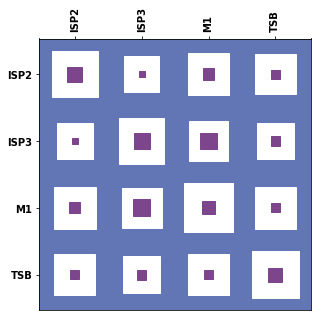

In [17]:
# strain by media
# pairs
import numpy as np
media_pair_mat = np.zeros((len(media_list),len(media_list)))
media_unique_pair_mat = np.zeros((len(media_list),len(media_list)))
for i,s in enumerate(media_list):
    for j,t in enumerate(media_list):
        inter_s = media_dict[s].intersection(media_dict[t])
        media_pair_mat[i,j] = len(media_dict[s].intersection(media_dict[t]))
        for k in media_list:
            if k == s or k == t:
                continue
            inter_s = inter_s.difference(media_dict[k])
        media_unique_pair_mat[i,j] = len(inter_s)
        
plt.figure(figsize=(5,5))
hinton(media_pair_mat,ax = plt.gca(),background = '#6276B5',add_numbers = False,mat2 = media_unique_pair_mat,mat2_color='#7D458B')
a = plt.xticks(range(len(media_list)),media_list)
a = plt.yticks(range(len(media_list)),media_list)
plt.gca().set_xticklabels(media_list, rotation = 90)
plt.gca().xaxis.tick_top()
plt.savefig('hinton_media_both.png')
write_csv('hinton_media_total.csv',media_pair_mat,media_list)

# plt.figure(figsize=(5,5))
# hinton(media_unique_pair_mat,ax = plt.gca(),background = '#298E47',add_numbers = False)
# a = plt.xticks(range(len(media_list)),media_list)
# a = plt.yticks(range(len(media_list)),media_list)
# plt.gca().set_xticklabels(media_list, rotation = 90)
# plt.gca().xaxis.tick_top()
# plt.savefig('hinton_media_unique.png')
write_csv('hinton_media_unique.csv',media_unique_pair_mat,media_list)

/Users/simon/.virtualenvs/nplinker-CEvfx91u/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


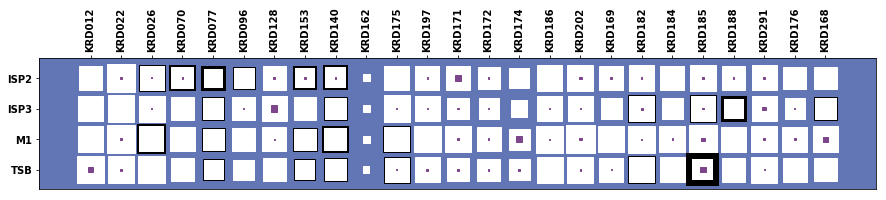

In [19]:
# strain by media
strain_media_mat = np.zeros((len(sorted_strain_list),len(media_list)))
unique_strain_media_mat = np.zeros((len(sorted_strain_list),len(media_list)))
for i,s in enumerate(sorted_strain_list):
    for j,m in enumerate(media_list):
        inter = strain_dict[s].intersection(media_dict[m])
        strain_media_mat[i,j] = len(inter)
        for s2 in strain_dict:
            for m2 in media_dict:
                if s2 == s:
                    continue
                if m2 == m:
                    continue
                inter -= strain_dict[s2]
                inter -= media_dict[m2]
        unique_strain_media_mat[i,j] = len(inter)
        
plt.figure(figsize=(15,8))

border_mat = np.zeros_like(strain_media_mat)

# load bioactivities
with open('bioactivity.csv','r') as f:
    reader = csv.reader(f,dialect='excel')
    current_strain = None
    for line in reader:
        strain = line[0]
        if len(strain) > 0:
            current_strain = strain
        if current_strain == 'KRD026':
            current_strain = 'KRD26'
        media = line[1]
        if len(media) == 0:
            continue
        count = int(line[2])
        strain_pos = sorted_strain_list.index(current_strain)
        media_pos = media_list.index(media)
        border_mat[strain_pos,media_pos] = count

display_strain_list = []
for s in sorted_strain_list:
    if len(s) < 6:
        # add the zero back in
        s2 = s[:3] + '0' + s[3:]
        display_strain_list.append(s2)
    else:
        display_strain_list.append(s)
  

# HACK - one strain was incorrectly labeled        
pos209 = display_strain_list.index('KRD209')
display_strain_list[pos209] = 'KRD291'



hinton(strain_media_mat,ax = plt.gca(),background = '#6276B5',add_numbers = False,mat2 = unique_strain_media_mat,mat2_color = '#7D458B',border_mat = border_mat,border_color = '#000000')
a = plt.yticks(range(len(media_list)),media_list)
a = plt.xticks(range(len(sorted_strain_list)),sorted_strain_list)
plt.gca().set_xticklabels(display_strain_list, rotation = 90)
plt.gca().xaxis.tick_top()
plt.savefig('hinton_media_strain_with_unique.png')
# write_csv('hinton_media_unique.csv',media_unique_pair_mat,media_list)

In [11]:
# write csv
def write_csv(filename,mat,heads):
    with open(filename,'w') as f:
        writer = csv.writer(f)
        writer.writerow([' ']+heads)
        for i,row in enumerate(mat):
            print(heads[i])
            writer.writerow([heads[i]]+[int(r) for r in row])

In [12]:
def hinton(matrix, max_weight=None, ax=None,background = [0.8,0.2,0.8],add_numbers = True,mat2 = None,mat2_color = None,border_mat = None,border_color = '#000000'):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor(background)
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        edge_color = color
        size = np.sqrt(np.abs(w) / max_weight)
        linewidth = 1
        if not border_mat is None:
            if border_mat[x,y] > 0:
                edge_color = border_color
                linewidth = border_mat[x,y]
            else:
                edge_color = color
                linewidth = 1
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=edge_color,linewidth=linewidth)
        ax.add_patch(rect)
        
        if not mat2 is None:
            w2 = mat2[x,y]
            size = np.sqrt(np.abs(w2) / max_weight)
            color2 = 'blue'
            rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                facecolor=mat2_color, edgecolor=mat2_color)
            ax.add_patch(rect)


        if add_numbers:
            plt.text(x-size/4,y,"{:d}".format(int(w)))

    ax.autoscale_view()
    ax.invert_yaxis()

In [16]:
membership_by_media = {}
for ion, signal in ions_membership.items():
    for signal_id in signal:
        signal_id_parts = signal_id.split('_')
        medium = signal_id_parts[-1].upper()
        strain = ''.join(signal_id_parts[:-1])
        if medium not in membership_by_media:
            membership_by_media[medium] = {}
        if ion not in membership_by_media[medium]:
            membership_by_media[medium][ion] = []
        membership_by_media[medium][ion].append(strain)

In [ ]:
bigscape_dir = "/home/grimur/data-carnegie/data-nplinker/bigscape"

In [71]:
cutoff = '30'

strains = set()

gcfs = {}
for product_type in os.listdir(bigscape_dir):
    if product_type.endswith('.tsv'):
        continue
    for filename in os.listdir(os.path.join(bigscape_dir, product_type)):
        if not ('cluster' in filename and cutoff in filename):
            continue
        path = os.path.join(bigscape_dir, product_type, filename)
        with open(path, 'r') as f:
            for l in f.readlines():
                if l.startswith('#'):
                    continue
                bgc_id, product_family_id = l.strip().split()
                # ??????
                family_id = product_type + product_family_id
                #family_id = product_family_id
                if family_id not in gcfs:
                    gcfs[family_id] = []
                strain = bgc_id.split('.')[0]
                gcfs[family_id].append(strain)
                
                strains.add(strain)

In [77]:
import _scoring as scoring
import numpy

In [86]:
scores_by_medium = {}

for medium, spectra in membership_by_media.items():
    scores_by_medium[medium] = []
    for spectrum, spectrum_strains in spectra.items():
        for gcf, gcf_strains in gcfs.items():
            spectrum_strain_count = len(strains.intersection(spectrum_strains))
            gcf_strain_count = len(gcf_strains)
            strain_count = len(strains)
            overlap = len(set(spectrum_strains).intersection(gcf_strains))
            
            metcalf_raw = scoring.metcalf_count(spectrum_strain_count, gcf_strain_count, overlap, strain_count, 10, -10, 0, 1)
            metcalf_exp, metcalf_var = scoring.metcalf_expected_count(spectrum_strain_count, gcf_strain_count, overlap, strain_count, 10, -10, 0, 1)
            metcalf_std = (metcalf_raw - metcalf_exp) / numpy.sqrt(metcalf_var)
            scores_by_medium[medium].append((metcalf_raw, metcalf_std))

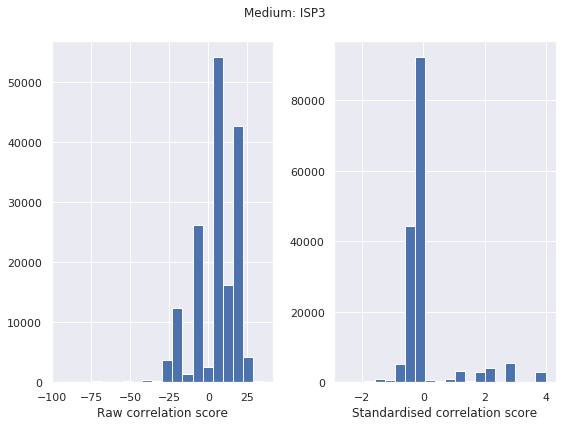

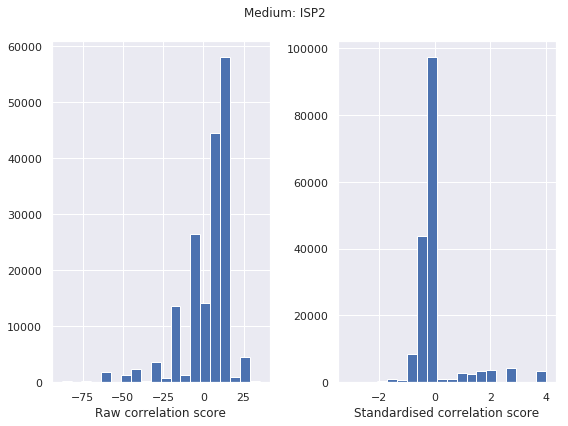

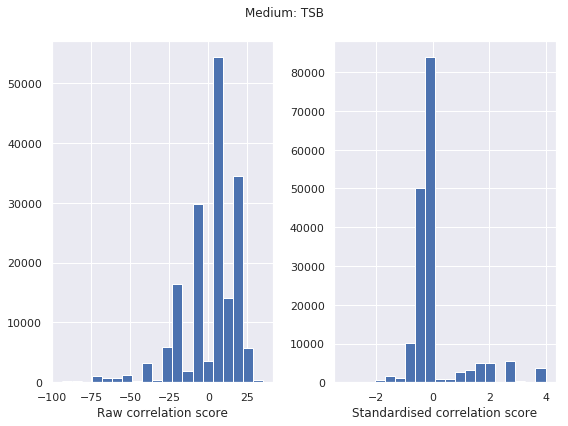

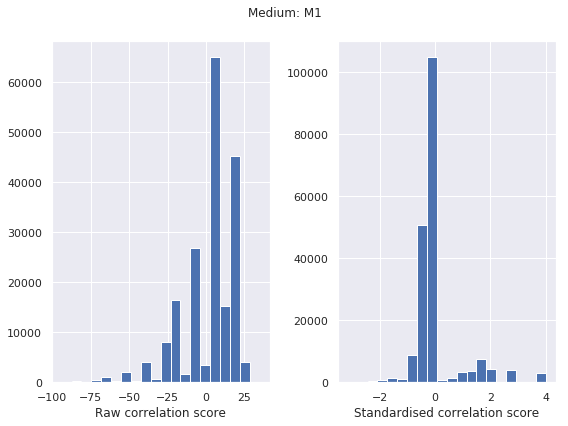

In [104]:
for medium, scores in scores_by_medium.items():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))

    fig.suptitle('Medium: {}'.format(medium))
    
    ax1.hist([x[0] for x in scores], bins=20)
    ax1.set_xlabel('Raw correlation score')

    ax2.hist([x[1] for x in scores], bins=20)
    ax2.set_xlabel('Standardised correlation score')

    plt.tight_layout()
    
    fig.subplots_adjust(top=0.9)